In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn                          
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from statistics import mean
from sklearn.model_selection import KFold

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [2]:
# load data
X = np.load("X.npy")
Y = np.load("y.npy")
X_social = np.load("X_extra.npy")
timeslots = np.load("timeslots.npy")

In [3]:
sx = X.shape
sy = Y.shape
X = np.reshape(X, (sx[0],sx[1]*sx[2]*sx[3]))
Y = np.reshape(Y, (sy[0],sy[1]*sy[2]*sy[3]))
X = np.concatenate((X, X_social), axis=1)

In [4]:
X_test = X[int(sx[0]*0.8):int(sx[0]),:]
Y_test = Y[int(sx[0]*0.8):int(sx[0]),:]

X_train = X[0:int(sx[0]*0.8),:]
Y_train = Y[0:int(sx[0]*0.8),:]

In [6]:
# Train Models
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, Y_train)
    y_test_predict[name] = estimator.predict(X_test)

In [16]:
y_test_predict['Extra trees'].shape[0]

1584

truth


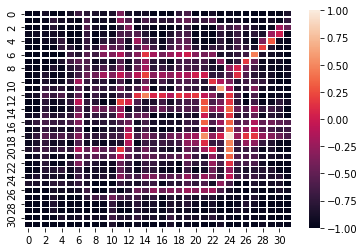

Extra trees
wasserstein distance:0.019269253499636096


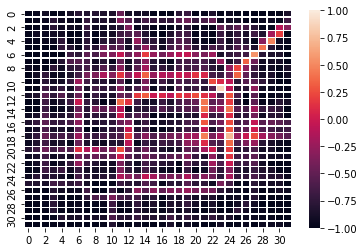

K-nn
wasserstein distance:0.022145026498056136


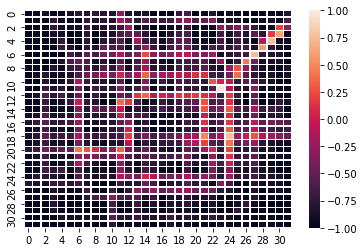

Linear regression
wasserstein distance:0.010718844593446904


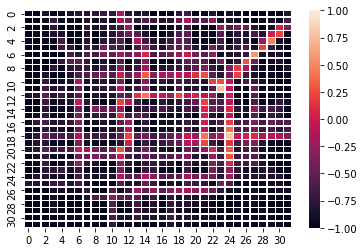

Ridge
wasserstein distance:0.008778335664301414


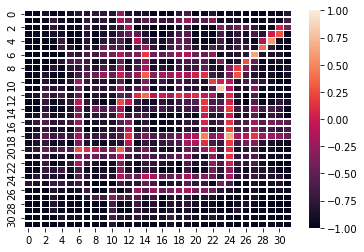

In [31]:
# Result Visualization 
import seaborn as sns
from scipy.stats import wasserstein_distance
from sklearn.metrics import mean_squared_error
print('truth')
m = Y.reshape(sy)[0,0,:,:]
ax = sns.heatmap(m, linewidth = 0.5, vmin = -1, vmax = 1)
plt.savefig('truth', dpi = 1000)
plt.show()
avg = dict()
for name in y_test_predict:
    print(name)
    acc_val = wasserstein_distance(Y[0,:],y_test_predict[name][0,:])
    print('wasserstein distance:'+str(acc_val))
    shp = (y_test_predict[name].shape[0],sy[1],sy[2],sy[3])
    test_reslut_temp = np.reshape(y_test_predict[name], shp)
    m = test_reslut_temp[0,0,:,:]
    ax = sns.heatmap(m, linewidth = 0.5, vmin = -1, vmax = 1)
    plt.savefig(name, dpi = 1000)
    plt.show()

In [49]:
# Model Evaluation
from sklearn.metrics import mean_squared_error
loss_WD = dict()
avg_WD = dict()
loss_RMSE = dict()
avg_RMSE = dict()
shp = Y_test.shape
for name in y_test_predict:
    loss_WD[name] = np.zeros(shp[0])
    loss_RMSE[name] = np.zeros(shp[0])
    temp_sum_WD = 0
    temp_sum_RMSE = 0
    for i in range(shp[0]):
        loss_WD[name][i] = wasserstein_distance(Y[i,:],y_test_predict[name][i,:])
        loss_RMSE[name][i] = mean_squared_error(Y[i,:],y_test_predict[name][i,:])
        temp_sum_WD += loss_WD[name][i]
        temp_sum_RMSE += loss_RMSE[name][i]
    avg_WD[name] = temp_sum_WD/shp[0]
    avg_RMSE[name] = temp_sum_RMSE/shp[0]

In [50]:
print(avg_WD)
print(avg_RMSE)

{'Extra trees': 0.026163503311733213, 'K-nn': 0.02652749647743351, 'Linear regression': 0.034874312591830006, 'Ridge': 0.029232956036114716}
{'Extra trees': 0.006643698126349279, 'K-nn': 0.007278495598723101, 'Linear regression': 0.014103102948029168, 'Ridge': 0.008681760855209554}
